In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from PyAstronomy import pyasl
from sklearn.metrics import mean_squared_error
from scipy.signal import savgol_filter
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df0=pd.read_csv(r'D:\UserData\z0041t8e\Documents\Projects\3_TICO 2\Compiled_Data\dataset0_smoothed.csv', sep=',',  index_col=0)
df1=pd.read_csv(r'D:\UserData\z0041t8e\Documents\Projects\3_TICO 2\Compiled_Data\dataset1_smoothed.csv', sep=',',  index_col=0)
df2=pd.read_csv(r'D:\UserData\z0041t8e\Documents\Projects\3_TICO 2\Compiled_Data\dataset2_smoothed.csv', sep=',',  index_col=0)
df3=pd.read_csv(r'D:\UserData\z0041t8e\Documents\Projects\3_TICO 2\Compiled_Data\dataset3_smoothed.csv', sep=',',  index_col=0)

dataset_df = pd.concat([df0, df1, df2, df3])

In [2]:
total_features_df = dataset_df.drop(['File_No', 'Cast_date', 'dayOfWeek', 'Die', 'cav1_defect','cav2_defect', 'defect'], axis=1)
total_features_df.head()

,fDie1wflow_en0,fDie1wflow_en1,fDie1wflow_en2,fDie1wflow_en3,fDie1wflow_en4,fDie1wflow_mse,fDie1wflow_mae,fDie2wflow_en0,fDie2wflow_en1,fDie2wflow_en2,...,tiebar_en12,tiebar_en13,tiebar_en14,tiebar_en15,tiebar_mse,tiebar_mae,Part,Shift,Shot_no,defect_smoothed
0,21.692999,0.759790,-0.968287,13.580341,-0.567633,0.002722,0.038137,9.908647,1.283877,-0.999141,...,-0.311415,-0.483169,-0.611454,-0.387602,0.002732,0.035002,B1012-278-1,1,5,0.0
1,22.802261,1.165540,-0.969839,15.000215,-0.767543,0.002549,0.035166,9.719274,1.268317,-0.999214,...,-0.312217,-0.477430,-0.606745,-0.379443,0.002792,0.035812,B1012-278-1,1,6,0.0
2,23.670288,1.490633,-0.969832,15.979490,-0.831797,0.002225,0.031885,9.586231,0.992506,-0.999257,...,-0.312139,-0.474928,-0.604088,-0.373460,0.002860,0.037235,B1012-278-1,1,7,0.0
3,23.920792,2.118496,-0.968945,15.828067,-0.853646,0.001940,0.026800,9.413850,0.393041,-0.999068,...,-0.322637,-0.462039,-0.586925,-0.352818,0.002696,0.037237,B1012-278-1,1,8,0.0
4,24.256344,2.081036,-0.970541,16.486008,-0.890179,0.001000,0.020291,9.127824,0.392960,-0.999210,...,-0.317911,-0.443705,-0.595761,-0.323802,0.002910,0.039074,B1012-278-1,1,9,0.0


In [3]:
features_df = total_features_df.drop(['defect_smoothed'], axis=1)
features_df = pd.get_dummies(features_df)
labels_df = dataset_df.loc[:, ['defect_smoothed']]
total_features_df.head()

,fDie1wflow_en0,fDie1wflow_en1,fDie1wflow_en2,fDie1wflow_en3,fDie1wflow_en4,fDie1wflow_mse,fDie1wflow_mae,fDie2wflow_en0,fDie2wflow_en1,fDie2wflow_en2,...,tiebar_en12,tiebar_en13,tiebar_en14,tiebar_en15,tiebar_mse,tiebar_mae,Part,Shift,Shot_no,defect_smoothed
0,21.692999,0.759790,-0.968287,13.580341,-0.567633,0.002722,0.038137,9.908647,1.283877,-0.999141,...,-0.311415,-0.483169,-0.611454,-0.387602,0.002732,0.035002,B1012-278-1,1,5,0.0
1,22.802261,1.165540,-0.969839,15.000215,-0.767543,0.002549,0.035166,9.719274,1.268317,-0.999214,...,-0.312217,-0.477430,-0.606745,-0.379443,0.002792,0.035812,B1012-278-1,1,6,0.0
2,23.670288,1.490633,-0.969832,15.979490,-0.831797,0.002225,0.031885,9.586231,0.992506,-0.999257,...,-0.312139,-0.474928,-0.604088,-0.373460,0.002860,0.037235,B1012-278-1,1,7,0.0
3,23.920792,2.118496,-0.968945,15.828067,-0.853646,0.001940,0.026800,9.413850,0.393041,-0.999068,...,-0.322637,-0.462039,-0.586925,-0.352818,0.002696,0.037237,B1012-278-1,1,8,0.0
4,24.256344,2.081036,-0.970541,16.486008,-0.890179,0.001000,0.020291,9.127824,0.392960,-0.999210,...,-0.317911,-0.443705,-0.595761,-0.323802,0.002910,0.039074,B1012-278-1,1,9,0.0


In [4]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)
print(scaled_features.shape)

C:\Users\z0041t8e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


(107569, 283)


C:\Users\z0041t8e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Total variance explained: 0.8525812758786799


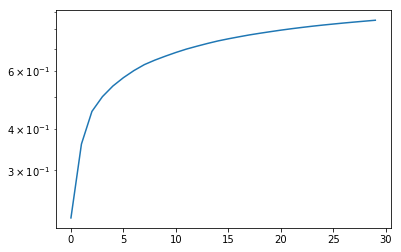

In [5]:
pca = PCA(n_components=30)
trans_features = pca.fit_transform(scaled_features)

print('Total variance explained:', pca.explained_variance_ratio_.sum())
plt.semilogy(pca.explained_variance_ratio_.cumsum())

In [6]:
target = labels_df.defect_smoothed.values
print(target.shape)
print(trans_features.shape)

(107569,)
(107569, 30)


(107569, 30)

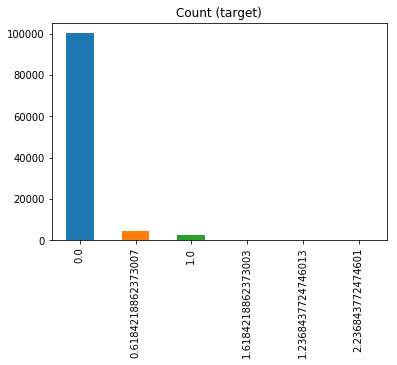

In [7]:
total_features_df.defect_smoothed.value_counts().plot(kind='bar', title='Count (target)');
trans_features.shape

In [ ]:
#Apply undersampling
from imblearn.under_sampling import RandomUnderSampler
#from imblearn.under_sampling import CondensedNearestNeighbour
rus = RandomUnderSampler(random_state=10)
X_res, y_res = rus.fit_resample(trans_features,target)
#fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)
print(X_res.shape)

In [23]:
trans_features.shape

(107569, 30)

In [16]:
from scipy import signal
downsamples = 25000

X_res = signal.resample(trans_features, downsamples, axis=0)
y_res = signal.resample(target, downsamples, axis=0)

C:\Users\z0041t8e\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
C:\Users\z0041t8e\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
C:\Users\z0041t8e\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` ins

In [17]:
from collections import Counter
Counter(y_res).keys() # equals to list(set(words))
#Counter(y_res).values() 

dict_keys([-0.02603227373226693, 0.034733961769438965, -0.05998436456956773, 0.2622364785280595, 0.529204915282299, 0.31885705523923946, -0.043754715742696945, 0.03304277701771506, 1.0269055908545504, 1.0618368455395655, -0.06398392897991612, 0.0726380952810024, -0.09540557633944724, 0.4591615026469501, 0.16420583313730025, -0.10314649223526626, 0.30270436604487455, 0.3554607247100868, -0.14029822754940494, 0.11279764226462899, -0.1094716682414474, 0.11745300302065118, -0.1367440138033466, 0.17575820389798888, -0.27022882840962, 0.8664020331316064, 0.9902921983389631, -0.17790059078712156, 0.055262676708912245, 0.09053462182088313, 0.4826878435738034, -0.03879113195180904, 0.5906429614691677, 0.35360545720927355, 0.16879669493899052, 0.8925113955583301, 0.08423758642279316, -0.054880845799231255, 0.04674367105543735, -0.04199555120299377, 0.038655375545666004, -0.03619960770518595, 0.03445025684179725, -0.03339521932640482, 0.03319889067213787, -0.03437673502953272, 0.03846531114133992

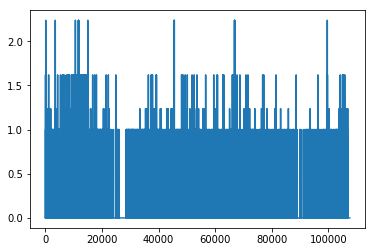

In [18]:
#plt.plot(y_res)
plt.plot(target)

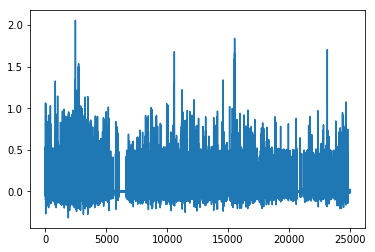

In [19]:
plt.plot(y_res)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.4, random_state=42)

In [21]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()

In [22]:
gpr = GaussianProcessRegressor(kernel=kernel,
        random_state=0)
gpr.fit(X_train, y_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=DotProduct(sigma_0=1) + WhiteKernel(noise_level=1),
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=0)

In [23]:
y_pred, sigma = gpr.predict(X_test, return_std=True)
y_pred_nr=(y_pred>0.5)

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_nr)

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [33]:
y_pred_nr.shape

(10000,)

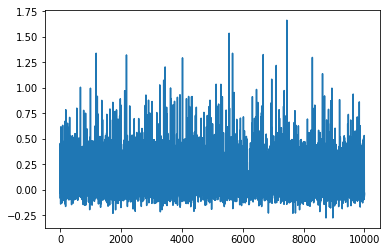

In [41]:
plt.plot(y_test)

In [77]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)
#mean_squared_error(y_test,y_pred)

0.09835231297058697

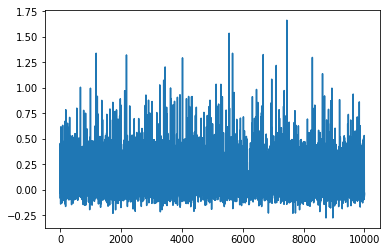

In [44]:
plt.plot(y_test)

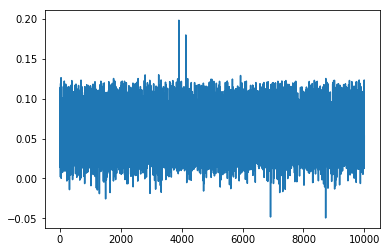

In [45]:
  plt.plot(y_pred)

In [42]:
y_pred.max()

0.19824726037040818

In [46]:
y_pred.min()

-0.04941025773587171

In [48]:
y_test.max()

1.663459844294522

In [49]:
y_test.min()

-0.2762045248182273

In [60]:
leftSpan = y_pred.max() - y_pred.min()
rightSpan = y_test.max() - y_test.min()
valueScaled = (y_pred - y_pred.min()) /leftSpan
y_pred_scaled = y_test.min() + (valueScaled * rightSpan)

In [64]:
y_test

array([-0.02621209,  0.04486509, -0.0002698 , ..., -0.03873668,
       -0.02733307, -0.05969786])

In [65]:
y_pred

array([0.06119933, 0.03474147, 0.04202183, ..., 0.12333969, 0.01907311,
       0.05303418])

In [56]:
valueScaled = (y_pred - y_pred.min()) /leftSpan

In [57]:
y_test.min() + (valueScaled * rightSpan)

array([0.59009454, 0.38287546, 0.43989551, ..., 1.07678054, 0.26016013,
       0.52614476])

In [73]:
np.mean(np.abs(y_pred- y_test) / np.abs(y_pred))

2.268436071770335

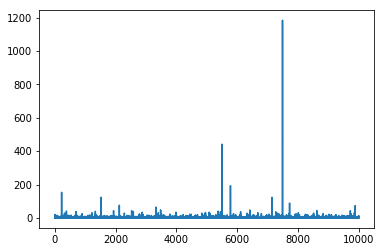

In [76]:
plt.plot(np.abs(y_pred- y_test)/np.abs(y_pred))

In [82]:
pd.options.display.float_format = '{:,.3f}'.format

In [83]:
dataset_df.corr()

,fDie1wflow_en0,fDie1wflow_en1,fDie1wflow_en2,fDie1wflow_en3,fDie1wflow_en4,fDie1wflow_mse,fDie1wflow_mae,fDie2wflow_en0,fDie2wflow_en1,fDie2wflow_en2,...,tiebar_mse,tiebar_mae,Die,Shift,Shot_no,dayOfWeek,cav1_defect,cav2_defect,defect,defect_smoothed
fDie1wflow_en0,1.000,-0.295,-0.113,0.814,-0.295,0.482,0.534,0.104,0.090,-0.341,...,-0.054,-0.126,-0.039,-0.013,0.077,-0.021,0.018,0.011,0.021,0.036
fDie1wflow_en1,-0.295,1.000,0.076,-0.702,0.650,0.019,0.025,-0.148,-0.091,0.878,...,0.110,0.205,-0.011,0.014,-0.077,0.045,-0.030,-0.025,-0.038,-0.063
fDie1wflow_en2,-0.113,0.076,1.000,-0.078,0.622,0.275,0.298,-0.066,0.040,0.045,...,0.012,0.019,-0.014,-0.000,-0.017,0.002,-0.004,-0.002,-0.004,-0.009
fDie1wflow_en3,0.814,-0.702,-0.078,1.000,-0.525,0.363,0.395,0.062,0.094,-0.644,...,-0.096,-0.207,0.052,-0.025,0.069,-0.026,0.032,0.022,0.037,0.062
fDie1wflow_en4,-0.295,0.650,0.622,-0.525,1.000,0.203,0.222,-0.097,-0.004,0.664,...,0.093,0.170,-0.124,0.037,-0.065,-0.021,-0.022,-0.018,-0.028,-0.049
fDie1wflow_mse,0.482,0.019,0.275,0.363,0.203,1.000,0.979,0.238,0.249,0.003,...,0.007,0.009,0.007,0.007,-0.014,-0.003,0.000,-0.004,-0.003,-0.004
fDie1wflow_mae,0.534,0.025,0.298,0.395,0.222,0.979,1.000,0.268,0.257,0.011,...,0.013,0.026,0.001,0.000,-0.019,-0.006,0.000,-0.006,-0.004,-0.006
fDie2wflow_en0,0.104,-0.148,-0.066,0.062,-0.097,0.238,0.268,1.000,0.622,-0.170,...,0.010,0.048,-0.149,0.018,0.013,-0.010,-0.002,-0.003,-0.004,-0.006
fDie2wflow_en1,0.090,-0.091,0.040,0.094,-0.004,0.249,0.257,0.622,1.000,-0.096,...,-0.011,-0.029,0.001,-0.010,0.002,-0.012,0.001,-0.000,0.001,0.001
fDie2wflow_en2,-0.341,0.878,0.045,-0.644,0.664,0.003,0.011,-0.170,-0.096,1.000,...,0.106,0.192,0.082,0.026,-0.163,0.031,-0.029,-0.028,-0.039,-0.066


In [84]:
sns.heatmap?

Object `sns.heatmap` not found.
